DATASET Link:

https://www.kaggle.com/datasets/atakanak/turkish-house-rent-prediction-dataset/data

# DATA ANALYSIS

In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from tqdm import tqdm

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [101]:
dataset = pd.read_csv("Dataset_TR/dataset_combined.csv")

In [102]:
dataset.shape

(8808, 16)

In [103]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,8808.0,4403.500000,2542.794919,0.0,2201.75,4403.5,6605.25,8807.0
Bathroom Count,8805.0,1.395798,0.794235,1.0,1.00,1.0,2.00,22.0
Price,8808.0,65536.602066,672055.265326,1.0,14000.00,20000.0,30000.00,40000000.0


In [104]:
dataset.head()

,Unnamed: 0,City,Town,Neighborhood,Apartment Type,House Type,House Age,House Size,Room Count,Floor,Furniture,Bathroom Count,Hand,Heater Type,Heater Fuel,Price
0,0,Ankara,Mamak,Akşemsettin,Daire,Daire,3,125 m2,3 + 1,Ara Kat,True,2.0,İkinci El,Kombi,Doğalgaz,16000
1,1,Adana,Seyhan,Yeşilyurt,Daire,Daire,5,140 m2,3 + 1,13. Kat,False,2.0,İkinci El,Kombi,Doğalgaz,15500
2,2,İstanbul,Beşiktaş,Nisbetiye,Residence,Residence,Sıfır,360 m2,4 + 1,21 ve üzeri,False,3.0,Sıfır,Merkezi (Pay Ölçer),Doğalgaz,350000
3,3,İstanbul,Beşiktaş,Nisbetiye,Residence,Residence,Sıfır,350 m2,4 + 1,Ara Kat,False,4.0,Sıfır,Merkezi (Pay Ölçer),Doğalgaz,350000
4,4,İstanbul,Şişli,Fulya,Daire,Daire,15,90 m2,1 + 1,5. Kat,True,1.0,İkinci El,Merkezi (Pay Ölçer),Doğalgaz,60000


In [105]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8808 entries, 0 to 8807
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      8808 non-null   int64  
 1   City            8808 non-null   object 
 2   Town            8808 non-null   object 
 3   Neighborhood    8808 non-null   object 
 4   Apartment Type  8808 non-null   object 
 5   House Type      8808 non-null   object 
 6   House Age       8808 non-null   object 
 7   House Size      8808 non-null   object 
 8   Room Count      8808 non-null   object 
 9   Floor           8202 non-null   object 
 10  Furniture       8460 non-null   object 
 11  Bathroom Count  8805 non-null   float64
 12  Hand            7047 non-null   object 
 13  Heater Type     8807 non-null   object 
 14  Heater Fuel     7217 non-null   object 
 15  Price           8808 non-null   int64  
dtypes: float64(1), int64(2), object(13)
memory usage: 1.1+ MB


In [106]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,8808.0,4403.500000,2542.794919,0.0,2201.75,4403.5,6605.25,8807.0
Bathroom Count,8805.0,1.395798,0.794235,1.0,1.00,1.0,2.00,22.0
Price,8808.0,65536.602066,672055.265326,1.0,14000.00,20000.0,30000.00,40000000.0


In [107]:
dataset.isnull().sum()

Unnamed: 0           0
City                 0
Town                 0
Neighborhood         0
Apartment Type       0
House Type           0
House Age            0
House Size           0
Room Count           0
Floor              606
Furniture          348
Bathroom Count       3
Hand              1761
Heater Type          1
Heater Fuel       1591
Price                0
dtype: int64

In [108]:
dataset.columns

Index(['Unnamed: 0', 'City', 'Town', 'Neighborhood', 'Apartment Type',
       'House Type', 'House Age', 'House Size', 'Room Count', 'Floor',
       'Furniture', 'Bathroom Count', 'Hand', 'Heater Type', 'Heater Fuel',
       'Price'],
      dtype='object')

In [109]:
for column in dataset.columns:
    print(column)
    print(pd.unique(dataset[column]))
    print("\n====================\n")

Unnamed: 0
[   0    1    2 ... 8805 8806 8807]


City
['Ankara' 'Adana' 'İstanbul' 'Muğla' 'Antalya' 'İzmir' 'Isparta' 'Aksaray'
 'Balıkesir' 'Tekirdağ' 'Edirne' 'Tokat' 'Bursa' 'Kocaeli' 'Aydın'
 'Erzincan' 'Burdur' 'Çanakkale' 'Yalova' 'Zonguldak' 'Kayseri' 'Giresun'
 'Eskişehir' 'Bolu' 'Düzce' 'Kastamonu' 'Amasya' 'Kahramanmaraş' 'Çorum'
 'Mersin(İçel)' 'Erzurum' 'Hatay' 'Samsun' 'Denizli' 'Manisa' 'Batman'
 'Bartın' 'Ordu' 'Gaziantep' 'Sakarya' 'Sivas' 'Kırıkkale' 'Kütahya'
 'Uşak' 'Nevşehir' 'Niğde' 'Osmaniye' 'Sinop' 'Rize' 'Trabzon' 'Konya'
 'Diyarbakır' 'Kırklareli' 'Karaman' 'Elazığ' 'Bilecik' 'Karabük' 'Mardin'
 'Van' 'Yozgat' 'Muş' 'Afyonkarahisar' 'K.K.T.C.' 'Kilis' 'Şanlıurfa'
 'Artvin' 'Malatya' 'Kırşehir' 'Adıyaman' 'Ağrı' 'Hakkari' 'Bitlis'
 'Çankırı' 'Bayburt']


Town
['Mamak' 'Seyhan' 'Beşiktaş' 'Şişli' 'Bodrum' 'Alanya' 'Bahçelievler'
 'Seferihisar' 'Çeşme' 'Serik' 'Etimesgut' 'Ortaca' 'Kadıköy' 'Sarıyer'
 'Çankaya' 'Beyoğlu' 'Avcılar' 'Merkez' 'Küçükçekmece' 'Erdek'

In [110]:
pd.unique(dataset["City"])

array(['Ankara', 'Adana', 'İstanbul', 'Muğla', 'Antalya', 'İzmir',
       'Isparta', 'Aksaray', 'Balıkesir', 'Tekirdağ', 'Edirne', 'Tokat',
       'Bursa', 'Kocaeli', 'Aydın', 'Erzincan', 'Burdur', 'Çanakkale',
       'Yalova', 'Zonguldak', 'Kayseri', 'Giresun', 'Eskişehir', 'Bolu',
       'Düzce', 'Kastamonu', 'Amasya', 'Kahramanmaraş', 'Çorum',
       'Mersin(İçel)', 'Erzurum', 'Hatay', 'Samsun', 'Denizli', 'Manisa',
       'Batman', 'Bartın', 'Ordu', 'Gaziantep', 'Sakarya', 'Sivas',
       'Kırıkkale', 'Kütahya', 'Uşak', 'Nevşehir', 'Niğde', 'Osmaniye',
       'Sinop', 'Rize', 'Trabzon', 'Konya', 'Diyarbakır', 'Kırklareli',
       'Karaman', 'Elazığ', 'Bilecik', 'Karabük', 'Mardin', 'Van',
       'Yozgat', 'Muş', 'Afyonkarahisar', 'K.K.T.C.', 'Kilis',
       'Şanlıurfa', 'Artvin', 'Malatya', 'Kırşehir', 'Adıyaman', 'Ağrı',
       'Hakkari', 'Bitlis', 'Çankırı', 'Bayburt'], dtype=object)

## Fix Room Count

In [111]:
pd.unique(dataset["Room Count"])

array(['3 + 1', '4 + 1', '1 + 1', '2 + 1', '5 + 1', '5 + 2', '7 + 1',
       '6 + 1', '8 + 1', '6 + 2', '10 + 2', '8 + 2', '3 + 2', '7 + 2',
       '4 + 2', '1 + 0', '2 + 0', '2 + 2', '6 + 3', '11 + 2', '9 + 3',
       '6 + 6', '6 + 0', '9 + 1', '25 + 2', '4 + 8', '1 + 3', '3 + 3',
       '3 + 0', '4 + 4', '5 + 3', '1 + 2', '41 + 1', '9 + 2', '10 + 1',
       '11 + 1', '4 + 0', '22 + 2', '4 + 3', '10 + 4', '11 + 3',
       '18 + 18'], dtype=object)

In [112]:
room_counts = dataset["Room Count"].value_counts()
room_counts

3 + 1      3058
2 + 1      2957
1 + 1      1523
4 + 1       658
5 + 1       161
1 + 0        87
4 + 2        71
5 + 2        65
3 + 2        49
6 + 1        42
2 + 0        32
6 + 2        19
2 + 2        14
7 + 1        13
7 + 2        11
5 + 3         6
8 + 1         5
3 + 3         4
3 + 0         3
9 + 1         2
9 + 2         2
1 + 2         2
6 + 6         2
6 + 0         2
6 + 3         2
8 + 2         2
10 + 1        1
11 + 3        1
10 + 4        1
4 + 3         1
22 + 2        1
4 + 0         1
11 + 1        1
41 + 1        1
10 + 2        1
25 + 2        1
4 + 4         1
11 + 2        1
9 + 3         1
1 + 3         1
4 + 8         1
18 + 18       1
Name: Room Count, dtype: int64

In [113]:
valid_rooms = room_counts[room_counts >= 10].index
filtered_df = dataset[dataset["Room Count"].isin(valid_rooms)]

In [114]:
filtered_df.shape

(8760, 16)

In [115]:
filtered_df["Room Count"].value_counts()

3 + 1    3058
2 + 1    2957
1 + 1    1523
4 + 1     658
5 + 1     161
1 + 0      87
4 + 2      71
5 + 2      65
3 + 2      49
6 + 1      42
2 + 0      32
6 + 2      19
2 + 2      14
7 + 1      13
7 + 2      11
Name: Room Count, dtype: int64

In [116]:
filtered_df[["Rooms", "Living Rooms"]] = filtered_df["Room Count"].str.split(r"\s*\+\s*", expand=True)

c:\Users\Giray\Projects\Rent_Estimation_System\tensorflow_env\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [117]:
filtered_df.shape

(8760, 18)

In [118]:
filtered_df[["Room Count","Rooms","Living Rooms"]]

,Room Count,Rooms,Living Rooms
0,3 + 1,3,1
1,3 + 1,3,1
2,4 + 1,4,1
3,4 + 1,4,1
4,1 + 1,1,1
...,...,...,...
8803,1 + 1,1,1
8804,2 + 1,2,1
8805,3 + 1,3,1
8806,3 + 1,3,1


In [119]:
filtered_df["Rooms"] = filtered_df["Rooms"].astype(int)
filtered_df["Living Rooms"] = filtered_df["Living Rooms"].astype(int)
filtered_df.drop(columns=["Room Count"], inplace=True)

c:\Users\Giray\Projects\Rent_Estimation_System\tensorflow_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\Users\Giray\Projects\Rent_Estimation_System\tensorflow_env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\Giray\Projects\Rent_Estimation_System\tensorflow_env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set o

In [120]:
filtered_df.shape

(8760, 17)

In [121]:
filtered_df

,Unnamed: 0,City,Town,Neighborhood,Apartment Type,House Type,House Age,House Size,Floor,Furniture,Bathroom Count,Hand,Heater Type,Heater Fuel,Price,Rooms,Living Rooms
0,0,Ankara,Mamak,Akşemsettin,Daire,Daire,3,125 m2,Ara Kat,True,2.0,İkinci El,Kombi,Doğalgaz,16000,3,1
1,1,Adana,Seyhan,Yeşilyurt,Daire,Daire,5,140 m2,13. Kat,False,2.0,İkinci El,Kombi,Doğalgaz,15500,3,1
2,2,İstanbul,Beşiktaş,Nisbetiye,Residence,Residence,Sıfır,360 m2,21 ve üzeri,False,3.0,Sıfır,Merkezi (Pay Ölçer),Doğalgaz,350000,4,1
3,3,İstanbul,Beşiktaş,Nisbetiye,Residence,Residence,Sıfır,350 m2,Ara Kat,False,4.0,Sıfır,Merkezi (Pay Ölçer),Doğalgaz,350000,4,1
4,4,İstanbul,Şişli,Fulya,Daire,Daire,15,90 m2,5. Kat,True,1.0,İkinci El,Merkezi (Pay Ölçer),Doğalgaz,60000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8803,8803,Konya,Ereğli,Toros,Daire,Daire,5,65 m2,Ara Kat,True,1.0,İkinci El,Kombi,Doğalgaz,8500,1,1
8804,8804,Antalya,Alanya,Mahmutlar,Daire,Daire,15,130 m2,2. Kat,False,1.0,NaN,Klima,Elektrik,13000,2,1
8805,8805,Isparta,Merkez,Çünür,Daire,Daire,5,150 m2,En Üst Kat,False,1.0,İkinci El,Kombi,Doğalgaz,16000,3,1
8806,8806,Kocaeli,Darıca,Nenehatun,Daire,Daire,1,173 m2,En Üst Kat,False,2.0,Sıfır,Kombi,Doğalgaz,21000,3,1


## 1-Analyze House Age

In [122]:
pd.unique(filtered_df["House Age"])

array(['3', '5', 'Sıfır', '15', '10', '21', '1', '27', '25', '11', '22',
       '2', '4', '30', '26', '24', '55', '35', '9', '14', '40', '31',
       '20', '8', '6', '18', '12', '7', '39', '13', '45', '17', '50',
       '16', '36', '100', '75', '19', '43', '28', '37', '33', '38', '69',
       '42', '32', '29', '60', '34', '23', '48', '70', '52', '200', '80',
       '220', '95', '46', '65', '49', '115', '273', '90', '74', '44',
       '150'], dtype=object)

In [123]:
filtered_df["House Age"].value_counts()

Sıfır    995
5        651
25       601
30       584
15       496
        ... 
49         1
95         1
220        1
200        1
150        1
Name: House Age, Length: 66, dtype: int64

In [124]:
filtered_df.groupby("House Age").agg(
    Mean_Price=("Price", "mean"),
    House_Count=("Price", "count")
).sort_values("House_Count", ascending=False)


,Mean_Price,House_Count
House Age,,
Sıfır,56248.968844,995
5,54267.196621,651
25,31695.008319,601
30,90231.849315,584
15,45768.830645,496
...,...,...
80,42000.000000,1
150,16500.000000,1
90,40000.000000,1


In [125]:
def clean_house_age(value):
    if value == "Sıfır":
        return 0
    try:
        return int(value)
    except:
        return None  # veya np.nan

filtered_df["House Age"] = filtered_df["House Age"].apply(clean_house_age)


c:\Users\Giray\Projects\Rent_Estimation_System\tensorflow_env\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":


In [126]:
filtered_df.groupby("House Age").agg(
    Mean_Price=("Price", "mean"),
    House_Count=("Price", "count")
).sort_values("House_Count", ascending=False)

,Mean_Price,House_Count
House Age,,
0,56248.968844,995
5,54267.196621,651
25,31695.008319,601
30,90231.849315,584
15,45768.830645,496
...,...,...
90,40000.000000,1
80,42000.000000,1
74,35000.000000,1


In [127]:
age_counts = filtered_df["House Age"].value_counts()
valid_ages = age_counts[age_counts >= 10].index

filtered_df = filtered_df[filtered_df["House Age"].isin(valid_ages)]

In [128]:
filtered_df.groupby("House Age").agg(
    Mean_Price=("Price", "mean"),
    House_Count=("Price", "count")
).sort_values("House_Count", ascending=False)

,Mean_Price,House_Count
House Age,,
0,56248.968844,995
5,54267.196621,651
25,31695.008319,601
30,90231.849315,584
15,45768.830645,496
20,127123.445585,487
10,54265.989384,471
4,74603.103550,338
35,31322.005988,334


## 2-Analyze House m2 Size

In [129]:
filtered_df["House Size"].value_counts()

120 m2    502
100 m2    502
110 m2    481
130 m2    448
90 m2     438
         ... 
386 m2      1
22 m2       1
279 m2      1
459 m2      1
173 m2      1
Name: House Size, Length: 275, dtype: int64

In [130]:
non_numeric_sizes = filtered_df[~filtered_df["House Size"].str.contains(r"\d", na=False)]


In [131]:
print("Non-numeric Data count:", len(non_numeric_sizes)) # Removing rows like "Kat Karşılığı :"

Non-numeric Data count: 9


In [132]:
filtered_df = filtered_df[filtered_df["House Size"].str.contains(r"\d", na=False)]


In [133]:
non_numeric_sizes = filtered_df[~filtered_df["House Size"].str.contains(r"\d", na=False)]
print("Non-numeric Data count:", len(non_numeric_sizes))

Non-numeric Data count: 0


In [134]:
def extract_m2(value):
    try:
        return float(value.replace(" m2", "").replace(".", ""))
    except:
        return None

filtered_df["House Size m2"] = filtered_df["House Size"].apply(extract_m2)
filtered_df.drop(columns=["House Size"], inplace=True)


In [135]:
filtered_df.shape

(8701, 17)

In [136]:
filtered_df.head()

,Unnamed: 0,City,Town,Neighborhood,Apartment Type,House Type,House Age,Floor,Furniture,Bathroom Count,Hand,Heater Type,Heater Fuel,Price,Rooms,Living Rooms,House Size m2
0,0,Ankara,Mamak,Akşemsettin,Daire,Daire,3,Ara Kat,True,2.0,İkinci El,Kombi,Doğalgaz,16000,3,1,125.0
1,1,Adana,Seyhan,Yeşilyurt,Daire,Daire,5,13. Kat,False,2.0,İkinci El,Kombi,Doğalgaz,15500,3,1,140.0
2,2,İstanbul,Beşiktaş,Nisbetiye,Residence,Residence,0,21 ve üzeri,False,3.0,Sıfır,Merkezi (Pay Ölçer),Doğalgaz,350000,4,1,360.0
3,3,İstanbul,Beşiktaş,Nisbetiye,Residence,Residence,0,Ara Kat,False,4.0,Sıfır,Merkezi (Pay Ölçer),Doğalgaz,350000,4,1,350.0
4,4,İstanbul,Şişli,Fulya,Daire,Daire,15,5. Kat,True,1.0,İkinci El,Merkezi (Pay Ölçer),Doğalgaz,60000,1,1,90.0


## 2.1-Outlier Analysis

In [137]:
filtered_df.shape

(8701, 17)

In [138]:
lower_price=6000
upper_price=40000

lower_m2=45
upper_m2=250

print("Price lower  than",lower_price, " : ", len(filtered_df[filtered_df["Price"]<lower_price]))
print("Price higher than",upper_price, " : ", len(filtered_df[filtered_df["Price"]>upper_price]))

print("House Size m2 lower  than", lower_m2, " : ", len(filtered_df[filtered_df["House Size m2"]<lower_m2]))
print("House Size m2 higher than",upper_m2, " : ", len(filtered_df[filtered_df["House Size m2"]>upper_m2]))

Price lower  than 6000  :  136
Price higher than 40000  :  1453
House Size m2 lower  than 45  :  82
House Size m2 higher than 250  :  437


In [139]:
filtered_df = filtered_df[
    (filtered_df["Price"] >= lower_price) & (filtered_df["Price"] <= upper_price) &
    (filtered_df["House Size m2"] >= lower_m2) & (filtered_df["House Size m2"] <= upper_m2) 
]
filtered_df.shape

(6933, 17)

In [140]:
filtered_df["Price"].sort_values(ascending=False)

1753    40000
4513    40000
7341    40000
8714    40000
2884    40000
        ...  
2885     6000
4290     6000
1705     6000
4155     6000
552      6000
Name: Price, Length: 6933, dtype: int64

## 3-Analyze Floor

In [141]:
filtered_df["Floor"].value_counts(dropna=False)

2. Kat             1023
1. Kat              882
3. Kat              877
Ara Kat             682
4. Kat              595
Yüksek Giriş        519
5. Kat              330
En Üst Kat          292
Giriş Katı          244
Bahçe Katı          229
NaN                 175
6. Kat              145
Kot 1               135
7. Kat              119
8. Kat              101
9. Kat               67
Zemin                66
Çatı Katı            63
10. Kat              44
11. Kat              42
Kot 2                36
12. Kat              32
Teras Katı           31
21 ve üzeri          31
13. Kat              28
Yarı Bodrum          28
14. Kat              24
Kot 3                22
Villa Katı           19
15. Kat              11
17. Kat               8
Bodrum                7
18. Kat               6
20. Kat               6
19. Kat               5
16. Kat               5
Bodrum ve Zemin       3
Asma Kat              1
Name: Floor, dtype: int64

In [142]:
def convert_floor(value):
    try:
        # ("2. Kat" → 2)
        if ". Kat" in value:
            return int(value.replace(". Kat", "").strip())
        
        # Special Floors:
        elif value == "Giriş Katı":
            return 0
        elif value == "Zemin":
            return 0
        elif value == "Bahçe Katı":
            return 0
        elif value == "Yüksek Giriş":
            return 0.5
        elif value == "Ara Kat":
            return 2.5  # Uncertain, can be any floor between (0,top). But there are sufficient amount of data.
        elif value == "En Üst Kat":
            return 20
        elif value == "Çatı Katı":
            return 20
        elif value == "Teras Katı":
            return 20
        elif value == "Bodrum":
            return -2
        elif value == "Yarı Bodrum":
            return -2
        elif value == "Bodrum ve Zemin":
            return -2
        elif value == "Villa Katı":
            return 1.5 # 1-2 floored
        elif "Kot" in value:
            return -1 * int(value.replace("Kot ", "").strip())
        elif "ve üzeri" in value:
            return 21
        else:
            return 2.75  # Unsufficient amount of data: Tripleks, Villa Katı, etc.
    
    except:
        return 2.5


In [143]:
filtered_df["Floor Level"] = filtered_df["Floor"].apply(convert_floor)
filtered_df["Floor Level"].value_counts(dropna=False)

 2.00     1023
 1.00      882
 3.00      877
 2.50      857
 4.00      595
 0.00      539
 0.50      519
 20.00     392
 5.00      330
 6.00      145
-1.00      135
 7.00      119
 8.00      101
-2.00       74
 9.00       67
 10.00      44
 11.00      42
 12.00      32
 21.00      31
 13.00      28
 14.00      24
-3.00       22
 1.50       19
 15.00      11
 17.00       8
 18.00       6
 19.00       5
 16.00       5
 2.75        1
Name: Floor Level, dtype: int64

## 4-Analyze Locations

In [144]:
filtered_df["City"].value_counts(dropna=False)

İstanbul    1819
Ankara      1477
İzmir        529
Antalya      443
Muğla        228
            ... 
Muş            1
Ağrı           1
Hakkari        1
Çankırı        1
Bayburt        1
Name: City, Length: 73, dtype: int64

In [145]:
filtered_df["Town"].value_counts(dropna=False)

Çankaya        621
Merkez         509
Keçiören       242
Şişli          189
Yenimahalle    176
              ... 
Erenler          1
Arhavi           1
Yomra            1
İncirliova       1
Termal           1
Name: Town, Length: 270, dtype: int64

In [146]:
filtered_df["Neighborhood"].value_counts(dropna=False)

Bahçelievler                145
Cumhuriyet                  111
Atatürk                      61
Merkez                       59
Hürriyet                     52
                           ... 
Çanaklı                       1
Turgut                        1
Barıştepe                     1
Yenimuhacir (Cumhuriyet)      1
Mavikent                      1
Name: Neighborhood, Length: 1602, dtype: int64

In [147]:
filtered_df.isnull().sum()

Unnamed: 0           0
City                 0
Town                 0
Neighborhood         0
Apartment Type       0
House Type           0
House Age            0
Floor              175
Furniture          262
Bathroom Count       3
Hand              1267
Heater Type          0
Heater Fuel       1125
Price                0
Rooms                0
Living Rooms         0
House Size m2        0
Floor Level          0
dtype: int64

## 5-Analyze Neighborhood

There can be multiple neighborhood with the same name. For example "Merkez" is very common neighborhood name.

In [148]:
filtered_df["Full Neighborhood"] = (
    filtered_df["City"] + " - " + 
    filtered_df["Town"] + " - " + 
    filtered_df["Neighborhood"]
)


In [149]:
filtered_df["Full Neighborhood"].nunique() 
# here is the proof. 
# If every neighborhood was unique the number should have been 1474.

2345

In [150]:
neigh_counts = filtered_df["Full Neighborhood"].value_counts()
valid_neighs = neigh_counts[neigh_counts >= 20].index

filtered_df["Neighborhood Grouped"] = filtered_df["Full Neighborhood"].apply(
    lambda x: x if x in valid_neighs else "Other"
)


In [151]:
filtered_df["Neighborhood Grouped"].value_counts(dropna=False)

Other                                    6435
Antalya - Alanya - Mahmutlar               31
İstanbul - Şişli - Mecidiyeköy             29
Ankara - Keçiören - Aşağı Eğlence          28
Ankara - Çankaya - Birlik                  26
Ankara - Keçiören - Etlik                  26
Ankara - Keçiören - Ayvalı                 26
Ankara - Altındağ - Aydınlıkevler          25
Ankara - Gölbaşı - İncek                   25
Ankara - Çankaya - Emek                    24
Ankara - Çankaya - Harbiye                 24
İstanbul - Kağıthane - Ortabayır           23
İstanbul - Bahçelievler - Siyavuşpaşa      23
İzmir - Karabağlar - Bahçelievler          22
Antalya - Konyaaltı - Hurma                22
Samsun - Atakum - Körfez                   22
İstanbul - Fatih - Seyyid Ömer             21
İstanbul - Kağıthane - Sultan Selim        21
Adana - Sarıçam - Gültepe                  20
İstanbul - Küçükçekmece - Atakent          20
İstanbul - Kağıthane - Çeliktepe           20
Bursa - Nilüfer - Dumlupınar      

## 6-Analyze Town

In [152]:
filtered_df["Full Town"] = (
    filtered_df["City"] + " - " + 
    filtered_df["Town"])

In [153]:
town_counts = filtered_df["Full Town"].value_counts()
valid_towns = town_counts[town_counts >= 20].index

filtered_df["Town Grouped"] = filtered_df["Full Town"].apply(
    lambda x: x if x in valid_towns else "Other"
)

In [154]:
filtered_df["Town Grouped"].value_counts(dropna=False)

Other                   1275
Ankara - Çankaya         621
Ankara - Keçiören        242
İstanbul - Şişli         189
Ankara - Yenimahalle     176
                        ... 
Kayseri - Melikgazi       21
Nevşehir - Merkez         20
İstanbul - Çekmeköy       20
İstanbul - Bağcılar       20
Antalya - Kemer           20
Name: Town Grouped, Length: 91, dtype: int64

## 7-Analyze City

In [155]:
city_counts = filtered_df["City"].value_counts()

filtered_cities = city_counts.loc[city_counts < 10]

print(filtered_cities)


Kırıkkale        9
Giresun          9
Kahramanmaraş    9
Aksaray          7
Ordu             7
Uşak             7
Şanlıurfa        6
Adıyaman         5
Sivas            5
Yozgat           5
Kırşehir         5
Kütahya          5
Bilecik          4
Malatya          4
Mardin           3
Niğde            2
Kilis            2
Batman           2
Elazığ           2
K.K.T.C.         1
Artvin           1
Muş              1
Ağrı             1
Hakkari          1
Çankırı          1
Bayburt          1
Name: City, dtype: int64


In [156]:
filtered_df["City"].nunique()

73

In [157]:
city_counts = filtered_df["City"].value_counts()
valid_cities = city_counts[city_counts >= 10].index

filtered_df["City Grouped"] = filtered_df["City"].apply(
    lambda x: x if x in valid_cities else "Other"
)

In [158]:
filtered_df["City Grouped"].nunique()

48

## Drop Unneccesary Columns

In [159]:
filtered_df

,Unnamed: 0,City,Town,Neighborhood,Apartment Type,House Type,House Age,Floor,Furniture,Bathroom Count,...,Price,Rooms,Living Rooms,House Size m2,Floor Level,Full Neighborhood,Neighborhood Grouped,Full Town,Town Grouped,City Grouped
0,0,Ankara,Mamak,Akşemsettin,Daire,Daire,3,Ara Kat,True,2.0,...,16000,3,1,125.0,2.5,Ankara - Mamak - Akşemsettin,Other,Ankara - Mamak,Ankara - Mamak,Ankara
1,1,Adana,Seyhan,Yeşilyurt,Daire,Daire,5,13. Kat,False,2.0,...,15500,3,1,140.0,13.0,Adana - Seyhan - Yeşilyurt,Other,Adana - Seyhan,Adana - Seyhan,Adana
7,7,İstanbul,Şişli,Fulya,Daire,Daire,21,4. Kat,True,1.0,...,35000,1,1,80.0,4.0,İstanbul - Şişli - Fulya,Other,İstanbul - Şişli,İstanbul - Şişli,İstanbul
10,10,İstanbul,Bahçelievler,Yenibosna Merkez,Daire,Daire,25,5. Kat,False,1.0,...,15000,2,1,90.0,5.0,İstanbul - Bahçelievler - Yenibosna Merkez,Other,İstanbul - Bahçelievler,İstanbul - Bahçelievler,İstanbul
12,12,İstanbul,Şişli,Bozkurt,Daire,Daire,22,4. Kat,False,2.0,...,40000,3,1,185.0,4.0,İstanbul - Şişli - Bozkurt,Other,İstanbul - Şişli,İstanbul - Şişli,İstanbul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8803,8803,Konya,Ereğli,Toros,Daire,Daire,5,Ara Kat,True,1.0,...,8500,1,1,65.0,2.5,Konya - Ereğli - Toros,Other,Konya - Ereğli,Other,Konya
8804,8804,Antalya,Alanya,Mahmutlar,Daire,Daire,15,2. Kat,False,1.0,...,13000,2,1,130.0,2.0,Antalya - Alanya - Mahmutlar,Antalya - Alanya - Mahmutlar,Antalya - Alanya,Antalya - Alanya,Antalya
8805,8805,Isparta,Merkez,Çünür,Daire,Daire,5,En Üst Kat,False,1.0,...,16000,3,1,150.0,20.0,Isparta - Merkez - Çünür,Other,Isparta - Merkez,Isparta - Merkez,Isparta
8806,8806,Kocaeli,Darıca,Nenehatun,Daire,Daire,1,En Üst Kat,False,2.0,...,21000,3,1,173.0,20.0,Kocaeli - Darıca - Nenehatun,Other,Kocaeli - Darıca,Other,Kocaeli


In [160]:
filtered_df.drop(columns=[
    "Unnamed: 0",
    "City",
    "Town",
    "Full Town",
    "Neighborhood",
    "Full Neighborhood",
    "Floor"
], inplace=True)

In [161]:
filtered_df.columns


Index(['Apartment Type', 'House Type', 'House Age', 'Furniture',
       'Bathroom Count', 'Hand', 'Heater Type', 'Heater Fuel', 'Price',
       'Rooms', 'Living Rooms', 'House Size m2', 'Floor Level',
       'Neighborhood Grouped', 'Town Grouped', 'City Grouped'],
      dtype='object')

In [162]:
filtered_df

,Apartment Type,House Type,House Age,Furniture,Bathroom Count,Hand,Heater Type,Heater Fuel,Price,Rooms,Living Rooms,House Size m2,Floor Level,Neighborhood Grouped,Town Grouped,City Grouped
0,Daire,Daire,3,True,2.0,İkinci El,Kombi,Doğalgaz,16000,3,1,125.0,2.5,Other,Ankara - Mamak,Ankara
1,Daire,Daire,5,False,2.0,İkinci El,Kombi,Doğalgaz,15500,3,1,140.0,13.0,Other,Adana - Seyhan,Adana
7,Daire,Daire,21,True,1.0,İkinci El,Kombi,Doğalgaz,35000,1,1,80.0,4.0,Other,İstanbul - Şişli,İstanbul
10,Daire,Daire,25,False,1.0,İkinci El,Kombi,Doğalgaz,15000,2,1,90.0,5.0,Other,İstanbul - Bahçelievler,İstanbul
12,Daire,Daire,22,False,2.0,İkinci El,Kombi,Doğalgaz,40000,3,1,185.0,4.0,Other,İstanbul - Şişli,İstanbul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8803,Daire,Daire,5,True,1.0,İkinci El,Kombi,Doğalgaz,8500,1,1,65.0,2.5,Other,Other,Konya
8804,Daire,Daire,15,False,1.0,NaN,Klima,Elektrik,13000,2,1,130.0,2.0,Antalya - Alanya - Mahmutlar,Antalya - Alanya,Antalya
8805,Daire,Daire,5,False,1.0,İkinci El,Kombi,Doğalgaz,16000,3,1,150.0,20.0,Other,Isparta - Merkez,Isparta
8806,Daire,Daire,1,False,2.0,Sıfır,Kombi,Doğalgaz,21000,3,1,173.0,20.0,Other,Other,Kocaeli


In [163]:
apartment_house_crosstab = pd.crosstab(filtered_df["Apartment Type"], filtered_df["House Type"])
apartment_house_crosstab # these columns are exactly same

House Type,Bina,Daire,Dağ Evi,Köy Evi,Müstakil Ev,Residence,Villa,Yalı Dairesi,Yazlık
Apartment Type,,,,,,,,,
Bina,10,0,0,0,0,0,0,0,0
Daire,0,6652,0,0,0,0,0,0,0
Dağ Evi,0,0,1,0,0,0,0,0,0
Köy Evi,0,0,0,1,0,0,0,0,0
Müstakil Ev,0,0,0,0,76,0,0,0,0
Residence,0,0,0,0,0,73,0,0,0
Villa,0,0,0,0,0,0,107,0,0
Yalı Dairesi,0,0,0,0,0,0,0,1,0
Yazlık,0,0,0,0,0,0,0,0,12


In [164]:
filtered_df.drop(columns=["Apartment Type"], inplace=True)

In [165]:
filtered_df

,House Type,House Age,Furniture,Bathroom Count,Hand,Heater Type,Heater Fuel,Price,Rooms,Living Rooms,House Size m2,Floor Level,Neighborhood Grouped,Town Grouped,City Grouped
0,Daire,3,True,2.0,İkinci El,Kombi,Doğalgaz,16000,3,1,125.0,2.5,Other,Ankara - Mamak,Ankara
1,Daire,5,False,2.0,İkinci El,Kombi,Doğalgaz,15500,3,1,140.0,13.0,Other,Adana - Seyhan,Adana
7,Daire,21,True,1.0,İkinci El,Kombi,Doğalgaz,35000,1,1,80.0,4.0,Other,İstanbul - Şişli,İstanbul
10,Daire,25,False,1.0,İkinci El,Kombi,Doğalgaz,15000,2,1,90.0,5.0,Other,İstanbul - Bahçelievler,İstanbul
12,Daire,22,False,2.0,İkinci El,Kombi,Doğalgaz,40000,3,1,185.0,4.0,Other,İstanbul - Şişli,İstanbul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8803,Daire,5,True,1.0,İkinci El,Kombi,Doğalgaz,8500,1,1,65.0,2.5,Other,Other,Konya
8804,Daire,15,False,1.0,NaN,Klima,Elektrik,13000,2,1,130.0,2.0,Antalya - Alanya - Mahmutlar,Antalya - Alanya,Antalya
8805,Daire,5,False,1.0,İkinci El,Kombi,Doğalgaz,16000,3,1,150.0,20.0,Other,Isparta - Merkez,Isparta
8806,Daire,1,False,2.0,Sıfır,Kombi,Doğalgaz,21000,3,1,173.0,20.0,Other,Other,Kocaeli


## 8-Analyze House Type

In [166]:
filtered_df["House Type"].value_counts(dropna=False)

Daire           6652
Villa            107
Müstakil Ev       76
Residence         73
Yazlık            12
Bina              10
Dağ Evi            1
Köy Evi            1
Yalı Dairesi       1
Name: House Type, dtype: int64

In [167]:
valid_house_types = ["Daire", "Villa", "Residence", "Müstakil Ev", "Yazlık"]
filtered_df = filtered_df[filtered_df["House Type"].isin(valid_house_types)]


In [168]:
filtered_df["House Type"].value_counts(dropna=False)

Daire          6652
Villa           107
Müstakil Ev      76
Residence        73
Yazlık           12
Name: House Type, dtype: int64

In [169]:
filtered_df

,House Type,House Age,Furniture,Bathroom Count,Hand,Heater Type,Heater Fuel,Price,Rooms,Living Rooms,House Size m2,Floor Level,Neighborhood Grouped,Town Grouped,City Grouped
0,Daire,3,True,2.0,İkinci El,Kombi,Doğalgaz,16000,3,1,125.0,2.5,Other,Ankara - Mamak,Ankara
1,Daire,5,False,2.0,İkinci El,Kombi,Doğalgaz,15500,3,1,140.0,13.0,Other,Adana - Seyhan,Adana
7,Daire,21,True,1.0,İkinci El,Kombi,Doğalgaz,35000,1,1,80.0,4.0,Other,İstanbul - Şişli,İstanbul
10,Daire,25,False,1.0,İkinci El,Kombi,Doğalgaz,15000,2,1,90.0,5.0,Other,İstanbul - Bahçelievler,İstanbul
12,Daire,22,False,2.0,İkinci El,Kombi,Doğalgaz,40000,3,1,185.0,4.0,Other,İstanbul - Şişli,İstanbul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8803,Daire,5,True,1.0,İkinci El,Kombi,Doğalgaz,8500,1,1,65.0,2.5,Other,Other,Konya
8804,Daire,15,False,1.0,NaN,Klima,Elektrik,13000,2,1,130.0,2.0,Antalya - Alanya - Mahmutlar,Antalya - Alanya,Antalya
8805,Daire,5,False,1.0,İkinci El,Kombi,Doğalgaz,16000,3,1,150.0,20.0,Other,Isparta - Merkez,Isparta
8806,Daire,1,False,2.0,Sıfır,Kombi,Doğalgaz,21000,3,1,173.0,20.0,Other,Other,Kocaeli


## 9-Analyze Heater Fuel

In [170]:
filtered_df["Heater Fuel"].value_counts(dropna=False)

Doğalgaz      4853
NaN           1125
Elektrik       856
Kömür-Odun      80
Akaryakıt        6
Name: Heater Fuel, dtype: int64

In [171]:
valid_heater_fuel_types = ["Doğalgaz", "Elektrik"]
filtered_df = filtered_df[filtered_df["Heater Fuel"].isin(valid_heater_fuel_types) | filtered_df["Heater Fuel"].isna()]
filtered_df["Heater Fuel"].value_counts(dropna=False)

Doğalgaz    4853
NaN         1125
Elektrik     856
Name: Heater Fuel, dtype: int64

## 10-Analyze Heater Type

In [172]:
filtered_df["Heater Type"].value_counts(dropna=False)

Kombi                  4425
Klima                   919
Merkezi                 529
Merkezi (Pay Ölçer)     493
Yerden Isıtma           169
Isıtma Yok               99
Kat Kaloriferi           38
Soba                     33
Doğalgaz Sobası          31
Belirtilmemiş            28
Jeotermal Isıtma         27
Güneş Enerjisi           24
Fancoil Ünitesi           9
VRV                       6
Isı Pompası               4
Name: Heater Type, dtype: int64

In [173]:
valid_heater_types = ["Kombi", "Klima", "Merkezi", "Merkezi (Pay Ölçer)", "Yerden Isıtma","Isıtma Yok"]
filtered_df = filtered_df[filtered_df["Heater Type"].isin(valid_heater_types)]
filtered_df["Heater Type"].value_counts(dropna=False)

Kombi                  4425
Klima                   919
Merkezi                 529
Merkezi (Pay Ölçer)     493
Yerden Isıtma           169
Isıtma Yok               99
Name: Heater Type, dtype: int64

## 11-Analyze Hand

In [174]:
filtered_df["Hand"].value_counts(dropna=False)

İkinci El    4482
NaN          1212
Sıfır         932
Betonarme       8
Name: Hand, dtype: int64

In [175]:
filtered_df = filtered_df[filtered_df["Hand"] != "Betonarme"]
filtered_df["Hand"] = filtered_df["Hand"].fillna("İkinci El")
filtered_df["Hand"].value_counts(dropna=False)

İkinci El    5694
Sıfır         932
Name: Hand, dtype: int64

## 12-Analyze Furniture

In [176]:
filtered_df["Furniture"].value_counts(dropna=False)

False    4237
True     2140
NaN       249
Name: Furniture, dtype: int64

In [177]:
filtered_df["Furniture"] = filtered_df["Furniture"].fillna(False)
filtered_df["Furniture"] = filtered_df["Furniture"].astype(bool)
filtered_df["Furniture"].value_counts(dropna=False)

False    4486
True     2140
Name: Furniture, dtype: int64

In [178]:
filtered_df

,House Type,House Age,Furniture,Bathroom Count,Hand,Heater Type,Heater Fuel,Price,Rooms,Living Rooms,House Size m2,Floor Level,Neighborhood Grouped,Town Grouped,City Grouped
0,Daire,3,True,2.0,İkinci El,Kombi,Doğalgaz,16000,3,1,125.0,2.5,Other,Ankara - Mamak,Ankara
1,Daire,5,False,2.0,İkinci El,Kombi,Doğalgaz,15500,3,1,140.0,13.0,Other,Adana - Seyhan,Adana
7,Daire,21,True,1.0,İkinci El,Kombi,Doğalgaz,35000,1,1,80.0,4.0,Other,İstanbul - Şişli,İstanbul
10,Daire,25,False,1.0,İkinci El,Kombi,Doğalgaz,15000,2,1,90.0,5.0,Other,İstanbul - Bahçelievler,İstanbul
12,Daire,22,False,2.0,İkinci El,Kombi,Doğalgaz,40000,3,1,185.0,4.0,Other,İstanbul - Şişli,İstanbul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8803,Daire,5,True,1.0,İkinci El,Kombi,Doğalgaz,8500,1,1,65.0,2.5,Other,Other,Konya
8804,Daire,15,False,1.0,İkinci El,Klima,Elektrik,13000,2,1,130.0,2.0,Antalya - Alanya - Mahmutlar,Antalya - Alanya,Antalya
8805,Daire,5,False,1.0,İkinci El,Kombi,Doğalgaz,16000,3,1,150.0,20.0,Other,Isparta - Merkez,Isparta
8806,Daire,1,False,2.0,Sıfır,Kombi,Doğalgaz,21000,3,1,173.0,20.0,Other,Other,Kocaeli


## 13-Analyze Bathroom Count

In [179]:
filtered_df["Bathroom Count"].isnull().sum()

3

In [180]:
filtered_df["Bathroom Count"] = filtered_df["Bathroom Count"].fillna(1.0)
filtered_df["Bathroom Count"].isnull().sum()

0

## 14-Analyze Other Columns

In [181]:
filtered_df.isnull().sum().sort_values(ascending=False)


Heater Fuel             1059
House Type                 0
House Age                  0
Furniture                  0
Bathroom Count             0
Hand                       0
Heater Type                0
Price                      0
Rooms                      0
Living Rooms               0
House Size m2              0
Floor Level                0
Neighborhood Grouped       0
Town Grouped               0
City Grouped               0
dtype: int64

In [182]:
filtered_df["Heater Fuel"] = filtered_df["Heater Fuel"].fillna("Bilinmiyor")

In [183]:
filtered_df["Floor Level"].value_counts(dropna=False)

 2.00     978
 1.00     853
 3.00     842
 2.50     786
 4.00     578
 0.00     513
 0.50     501
 20.00    371
 5.00     318
 6.00     140
-1.00     134
 7.00     107
 8.00      98
-2.00      73
 9.00      67
 10.00     43
 11.00     40
 12.00     32
 21.00     28
 13.00     27
 14.00     24
-3.00      20
 1.50      18
 15.00     11
 17.00      8
 18.00      6
 19.00      5
 16.00      4
 2.75       1
Name: Floor Level, dtype: int64

In [184]:
filtered_df.isnull().sum().sort_values(ascending=False)

House Type              0
House Age               0
Furniture               0
Bathroom Count          0
Hand                    0
Heater Type             0
Heater Fuel             0
Price                   0
Rooms                   0
Living Rooms            0
House Size m2           0
Floor Level             0
Neighborhood Grouped    0
Town Grouped            0
City Grouped            0
dtype: int64

In [185]:
filtered_df

,House Type,House Age,Furniture,Bathroom Count,Hand,Heater Type,Heater Fuel,Price,Rooms,Living Rooms,House Size m2,Floor Level,Neighborhood Grouped,Town Grouped,City Grouped
0,Daire,3,True,2.0,İkinci El,Kombi,Doğalgaz,16000,3,1,125.0,2.5,Other,Ankara - Mamak,Ankara
1,Daire,5,False,2.0,İkinci El,Kombi,Doğalgaz,15500,3,1,140.0,13.0,Other,Adana - Seyhan,Adana
7,Daire,21,True,1.0,İkinci El,Kombi,Doğalgaz,35000,1,1,80.0,4.0,Other,İstanbul - Şişli,İstanbul
10,Daire,25,False,1.0,İkinci El,Kombi,Doğalgaz,15000,2,1,90.0,5.0,Other,İstanbul - Bahçelievler,İstanbul
12,Daire,22,False,2.0,İkinci El,Kombi,Doğalgaz,40000,3,1,185.0,4.0,Other,İstanbul - Şişli,İstanbul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8803,Daire,5,True,1.0,İkinci El,Kombi,Doğalgaz,8500,1,1,65.0,2.5,Other,Other,Konya
8804,Daire,15,False,1.0,İkinci El,Klima,Elektrik,13000,2,1,130.0,2.0,Antalya - Alanya - Mahmutlar,Antalya - Alanya,Antalya
8805,Daire,5,False,1.0,İkinci El,Kombi,Doğalgaz,16000,3,1,150.0,20.0,Other,Isparta - Merkez,Isparta
8806,Daire,1,False,2.0,Sıfır,Kombi,Doğalgaz,21000,3,1,173.0,20.0,Other,Other,Kocaeli


In [186]:
filtered_df["Bathroom Count"].value_counts(dropna=False)

1.0     5339
2.0     1214
3.0       65
4.0        6
11.0       1
5.0        1
Name: Bathroom Count, dtype: int64

In [187]:
filtered_df = filtered_df[filtered_df["Bathroom Count"] <= 4.0]
filtered_df["Bathroom Count"].value_counts(dropna=False)

1.0    5339
2.0    1214
3.0      65
4.0       6
Name: Bathroom Count, dtype: int64

In [188]:
filtered_df["Hand"].value_counts(dropna=False)

İkinci El    5692
Sıfır         932
Name: Hand, dtype: int64

In [189]:
filtered_df["IsNew"] = filtered_df["Hand"].map({"Sıfır": 1, "İkinci El": 0})
filtered_df.drop(columns=["Hand"], inplace=True)

c:\Users\Giray\Projects\Rent_Estimation_System\tensorflow_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\Users\Giray\Projects\Rent_Estimation_System\tensorflow_env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Correlation Analysis

In [190]:
# select numerical columns
numeric_df = filtered_df.select_dtypes(include=["number"])

# create correlation matrix
correlation_with_price = numeric_df.corr()["Price"].sort_values(ascending=False)

correlation_with_price

Price             1.000000
Bathroom Count    0.332318
House Size m2     0.316582
Rooms             0.283462
Living Rooms      0.121039
Floor Level       0.086650
House Age         0.039236
IsNew             0.015240
Name: Price, dtype: float64

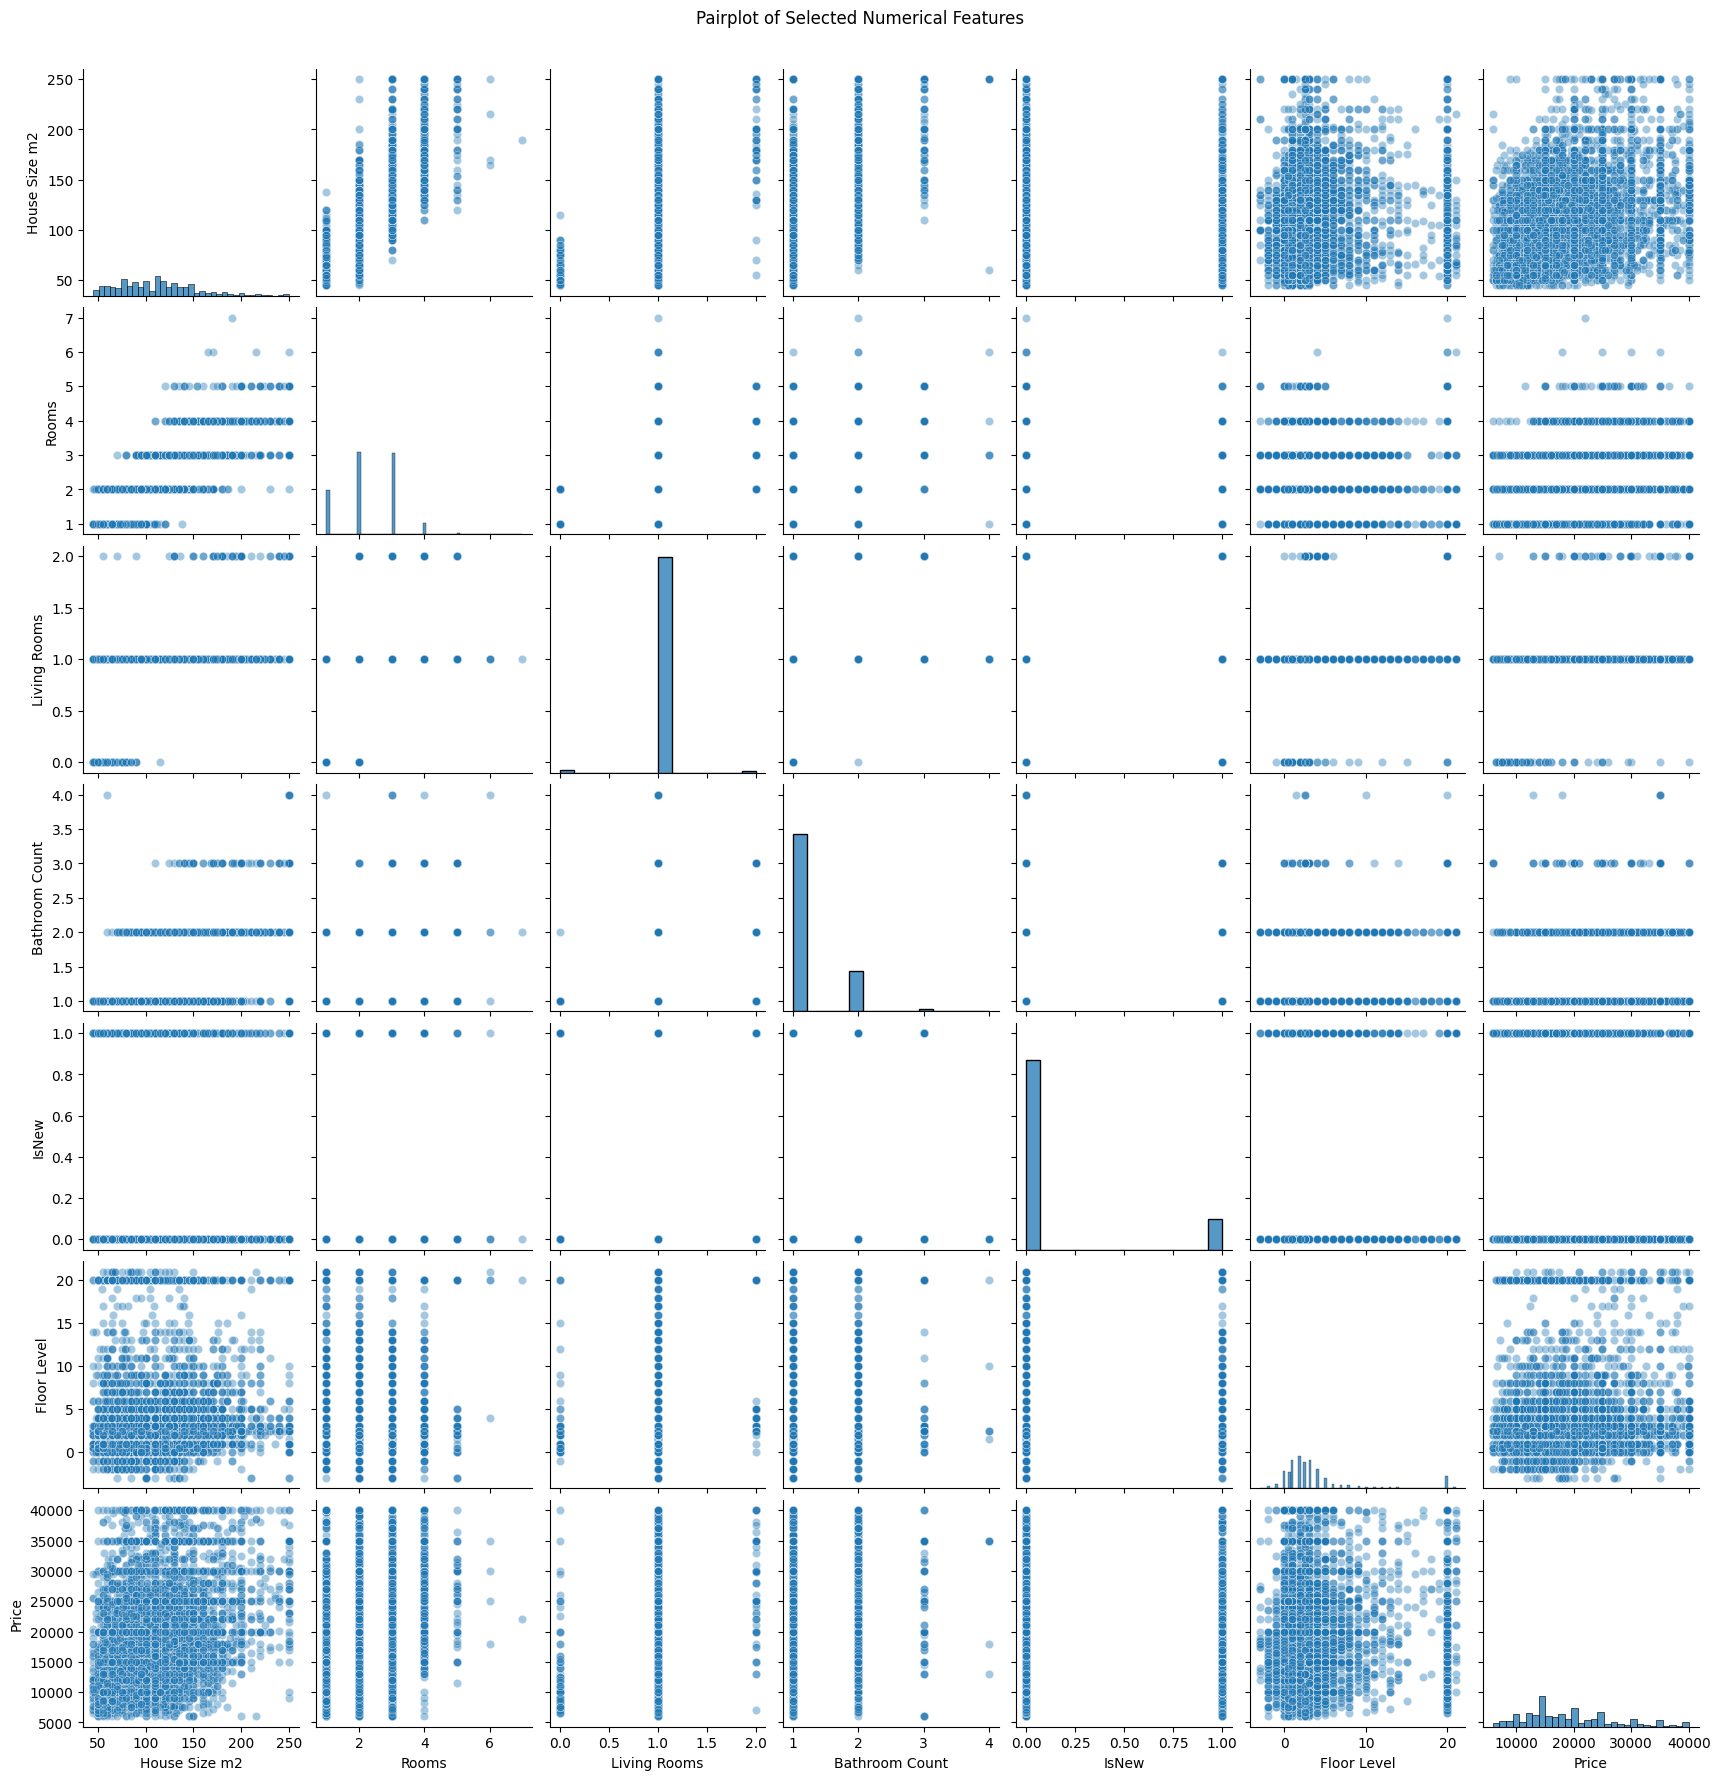

In [191]:
selected_columns = [ 
    "House Size m2", 
    "Rooms", 
    "Living Rooms", 
    "Bathroom Count",
    "IsNew", 
    "Floor Level",
    "Price"
]

# Pairplot
sns.pairplot(filtered_df[selected_columns], corner=False, plot_kws={'alpha': 0.4})
plt.suptitle("Pairplot of Selected Numerical Features", y=1.02)
plt.show()

## 15-One-Hot-Encoding

In [192]:
categorical_columns = [
    "House Type",
    "Heater Type",
    "Heater Fuel",
    "Neighborhood Grouped",
    "Town Grouped",
    "City Grouped"
]

# Apply one-hot encoding
encoded_df = pd.get_dummies(filtered_df, columns=categorical_columns, drop_first=True)

# Show resulting shape and preview
encoded_df.shape, encoded_df.head()

((6624, 178),
     House Age  Furniture  Bathroom Count  Price  Rooms  Living Rooms  \
 0           3       True             2.0  16000      3             1   
 1           5      False             2.0  15500      3             1   
 7          21       True             1.0  35000      1             1   
 10         25      False             1.0  15000      2             1   
 12         22      False             2.0  40000      3             1   
 
     House Size m2  Floor Level  IsNew  House Type_Müstakil Ev  ...  \
 0           125.0          2.5      0                       0  ...   
 1           140.0         13.0      0                       0  ...   
 7            80.0          4.0      0                       0  ...   
 10           90.0          5.0      0                       0  ...   
 12          185.0          4.0      0                       0  ...   
 
     City Grouped_Tekirdağ  City Grouped_Tokat  City Grouped_Trabzon  \
 0                       0                   0

In [193]:
for column in encoded_df.columns:
    print(column)

House Age
Furniture
Bathroom Count
Price
Rooms
Living Rooms
House Size m2
Floor Level
IsNew
House Type_Müstakil Ev
House Type_Residence
House Type_Villa
House Type_Yazlık
Heater Type_Klima
Heater Type_Kombi
Heater Type_Merkezi
Heater Type_Merkezi (Pay Ölçer)
Heater Type_Yerden Isıtma
Heater Fuel_Doğalgaz
Heater Fuel_Elektrik
Neighborhood Grouped_Ankara - Altındağ - Aydınlıkevler
Neighborhood Grouped_Ankara - Gölbaşı - İncek
Neighborhood Grouped_Ankara - Keçiören - Ayvalı
Neighborhood Grouped_Ankara - Keçiören - Aşağı Eğlence
Neighborhood Grouped_Ankara - Keçiören - Etlik
Neighborhood Grouped_Ankara - Çankaya - Birlik
Neighborhood Grouped_Ankara - Çankaya - Emek
Neighborhood Grouped_Ankara - Çankaya - Harbiye
Neighborhood Grouped_Antalya - Alanya - Mahmutlar
Neighborhood Grouped_Antalya - Konyaaltı - Hurma
Neighborhood Grouped_Bursa - Nilüfer - Dumlupınar
Neighborhood Grouped_Other
Neighborhood Grouped_Samsun - Atakum - Körfez
Neighborhood Grouped_İstanbul - Bahçelievler - Siyavuşpaşa
N

## 16-Train/Test Split

In [194]:
X = encoded_df.drop(columns=["Price"])
y = encoded_df["Price"]

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [196]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5299, 177), (1325, 177), (5299,), (1325,))

# MACHINE LEARNING

In [197]:
# Models and hyperparameters

param_grids = {
    "KNN": {
        "model": KNeighborsRegressor(),
        "params": {
            "n_neighbors": [3, 5, 7, 9, 11],
            "weights": ["uniform", "distance"],
            "p": [1, 2]  # Manhattan (p=1) & Euclidean (p=2)
        }
    },
    "SVR": {
        "model": SVR(),
        "params": {
            "C": [0.1, 1, 10, 100],
            "kernel": ["rbf", "linear"],
            "epsilon": [0.1, 0.2],
            "gamma": ["scale", "auto", 0.1, 1]
        }
    },
    "DecisionTree": {
        "model": DecisionTreeRegressor(),
        "params": {
            "max_depth": [5, 10, 15, None],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4],
            "max_features": [None, "sqrt", "log2"],
            "criterion": ["squared_error"]
        }
    },
    "RandomForest": {
        "model": RandomForestRegressor(),
        "params": {
            "n_estimators": [50, 100, 200],
            "max_depth": [10, 20, None],
            "min_samples_split": [2, 5],
            "max_features": ["sqrt", None],
            "criterion": ["squared_error"],
            "bootstrap": [True, False]
        }
    },
    "GBM": {
        "model": GradientBoostingRegressor(),
        "params": {
            "n_estimators": [100, 200],
            "learning_rate": [0.05, 0.1, 0.2],
            "max_depth": [3, 5, 7],
            "subsample": [0.8, 1.0],
            "max_features": [None, "sqrt"],
            "loss": ["squared_error"]
        }
    },
    "XGBoost": {
        "model": XGBRegressor(verbosity=0),
        "params": {
            "n_estimators": [100, 200],
            "learning_rate": [0.05, 0.1, 0.2],
            "max_depth": [3, 5, 7],
            "subsample": [0.8, 1.0],
            "colsample_bytree": [0.8, 1.0], 
            "gamma": [0, 0.1],  # Minimum loss reduction
            "reg_alpha": [0, 0.1]  # L1 regularization
        }
    },
    "LightGBM": {
        "model": LGBMRegressor(verbose=-1),
        "params": {
            "n_estimators": [100, 200],
            "learning_rate": [0.05, 0.1, 0.2],
            "max_depth": [4, 6, 8],
            "subsample": [0.8, 1.0],
            "feature_fraction": [0.8, 1.0],  # Column sampling
            "reg_alpha": [0, 0.1],  # L1 regularization
            "reg_lambda": [0, 0.1]  # L2 regularization
        }
    }
}


# Collect best results
best_models = []

for name in tqdm(param_grids.keys(), desc="Model Training"):
    try:
        print(f"\nTraining {name}...")
        start_time = time.time()

        grid = GridSearchCV(
            param_grids[name]["model"],
            param_grids[name]["params"],
            cv=3,
            scoring="neg_root_mean_squared_error",
            n_jobs=1
        )
        grid.fit(X_train, y_train)

        end_time = time.time()
        elapsed = end_time - start_time

        best_model = grid.best_estimator_
        preds = best_model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, preds))
        mape = mean_absolute_percentage_error(y_test, preds)

        best_models.append((name, rmse, mape, grid.best_params_, elapsed))
        print(f"{name} - completed in {elapsed:.2f} seconds")

    except Exception as e:
        print(f"Skipped {name} due to error: {e}")

Model Training:   0%|          | 0/7 [00:00<?, ?it/s]


Training KNN...


Model Training:  14%|█▍        | 1/7 [00:30<03:02, 30.36s/it]

KNN - completed in 29.36 seconds

Training SVR...


Model Training:  29%|██▊       | 2/7 [04:48<13:41, 164.30s/it]

SVR - completed in 257.81 seconds

Training DecisionTree...


Model Training:  43%|████▎     | 3/7 [05:03<06:25, 96.31s/it] 

DecisionTree - completed in 15.39 seconds

Training RandomForest...


Model Training:  57%|█████▋    | 4/7 [10:12<09:00, 180.14s/it]

RandomForest - completed in 308.58 seconds

Training GBM...


Model Training:  71%|███████▏  | 5/7 [13:32<06:14, 187.40s/it]

GBM - completed in 200.25 seconds

Training XGBoost...


Model Training:  86%|████████▌ | 6/7 [22:26<05:05, 305.10s/it]

XGBoost - completed in 533.55 seconds

Training LightGBM...


Model Training: 100%|██████████| 7/7 [23:10<00:00, 198.67s/it]

LightGBM - completed in 44.41 seconds


In [198]:
best_models

[('KNN',
  6419.426173297419,
  0.2920458935887653,
  {'n_neighbors': 11, 'p': 1, 'weights': 'distance'},
  29.358993530273438),
 ('SVR',
  5398.246757642905,
  0.228870629706863,
  {'C': 100, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear'},
  257.81399869918823),
 ('DecisionTree',
  5899.69664818684,
  0.2607026204137362,
  {'criterion': 'squared_error',
   'max_depth': 10,
   'max_features': None,
   'min_samples_leaf': 4,
   'min_samples_split': 10},
  15.391002416610718),
 ('RandomForest',
  4790.904530882978,
  0.210348924631611,
  {'bootstrap': False,
   'criterion': 'squared_error',
   'max_depth': None,
   'max_features': 'sqrt',
   'min_samples_split': 5,
   'n_estimators': 200},
  308.5805313587189),
 ('GBM',
  4796.000132300907,
  0.20739286243555408,
  {'learning_rate': 0.1,
   'loss': 'squared_error',
   'max_depth': 7,
   'max_features': 'sqrt',
   'n_estimators': 200,
   'subsample': 1.0},
  200.25013208389282),
 ('XGBoost',
  4744.075053078235,
  0.203970766970733

In [199]:
results_df = pd.DataFrame(best_models, columns=["Model", "RMSE", "MAPE", "Best Params", "Training Time (s)"])
results_df.sort_values("MAPE", ascending=True, inplace=True)

results_df

,Model,RMSE,MAPE,Best Params,Training Time (s)
5,XGBoost,4744.075053,0.203971,"{'colsample_bytree': 0.8, 'gamma': 0, 'learnin...",533.552095
4,GBM,4796.000132,0.207393,"{'learning_rate': 0.1, 'loss': 'squared_error'...",200.250132
3,RandomForest,4790.904531,0.210349,"{'bootstrap': False, 'criterion': 'squared_err...",308.580531
6,LightGBM,4953.731574,0.218108,"{'feature_fraction': 0.8, 'learning_rate': 0.2...",44.405263
1,SVR,5398.246758,0.228871,"{'C': 100, 'epsilon': 0.1, 'gamma': 'scale', '...",257.813999
2,DecisionTree,5899.696648,0.260703,"{'criterion': 'squared_error', 'max_depth': 10...",15.391002
0,KNN,6419.426173,0.292046,"{'n_neighbors': 11, 'p': 1, 'weights': 'distan...",29.358994
